# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EAD)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
<h2 style='color:#ba2b43'><li>Introducion</li></h2>

### Dataset Description 
This dataset for analysis is the "TMDB Movie Metadata" accessible via Kaggle. It encompasses various movie details such as budget, revenue, genre, director, cast, popularity, and user ratings. This dataset comprises information on 10,000 movies sourced from The Movie Database (TMDb), featuring both user ratings and revenue data.

The dataset coulumn describtion: 
- id: A unique code assigned to each individual movie.
- imdb_id: A unique code assigned to each individual movie
- popularity: A numerical value indicating the level of popularity of the movie.
- budget: The amount of money allocated for the production of the movie.
- revenue: The total income generated worldwide by the movie.
- original title: The title of the movie in its original language prior to any translations or adaptations.
- cast: The names of the main and supporting actors.
- homepage: A link directing to the official webpage of the movie.
- director: The creative leader responsible for guiding all aspects of a film's production.
- tagline: A concise phrase or sentence representing the essence of the movie.
- keywords: Specific words or phrases associated with the movie.
- overview: A brief summary outlining the plot or content of the movie.
- runtime: The duration of the movie in minutes.
- genres: The categories or types of the movie, such as Action, Comedy, Thriller, etc.
- production companies: The organizations responsible for the production of the movie.
- release date: The date on which the movie was officially released.
- vote count: The total number of votes received for the movie.
- vote average: The average rating given to the movie.
- release year: The year on which the movie was officially released
- budget_adj: The budget of the movie adjusted to reflect 2010 dollar values, accounting for inflation.
- revenue_adj: The revenue of the movie adjusted to reflect 2010 dollar values, accounting for inflation.

<h2><li>Import the libraries</li></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcursors
%matplotlib inline

<h2><li>Import the file</li></h2>

In [2]:
movies = pd.read_csv("data/tmdb_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


<h2><li>Knowing some information about the data</li></h2>

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Missing values in descending order:
* homepage
* tagline
* overview
* runtime
* release_date

In [4]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Numerical Values:
* budget
* id
* popularity
* revenue
* runtime
* vote_average
* vote_count

<a id="wrangling"></a>
<h2 style='color:#ba2b43'><li>Data Wrangling</li></h2>

In [5]:
movies.shape

(4803, 20)

In [6]:
movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [7]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
movies.duplicated().sum()

0

#### Important Features:
1. genres
2. original languages & spoken language
3. revenue
4. production companies
5. production country
6. popularity
7. release_date

In [9]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
movies.drop(["homepage", "id", "keywords", 'tagline'], inplace=True, axis=1)

In [11]:
movies.head(10)

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name""

In [12]:
movies.isnull().sum()

budget                  0
genres                  0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [13]:
movies[movies["release_date"].isna()]

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


In [14]:
movies[movies["runtime"].isna()]

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [15]:
movies[movies["overview"].isna()]

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Food Chains,7.4,8


<h3><li>Remove all missing values</li></h3>

In [16]:
movies.dropna(inplace=True)

In [17]:
# if the value equal `[]` or `empty` remove it
for i in movies.columns:
    miss = movies[movies[i] == ""].index
    movies.drop(miss, inplace=True)
    miss2 = movies[movies[i] == "[]"].index
    movies.drop(miss2, inplace=True)
movies

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Bang,6.0,1
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Primer,6.9,658
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6


In [18]:
movies.isna().sum()

budget                  0
genres                  0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [19]:
movies["profit"] = movies["revenue"] - movies["budget"]

<h3><li>Create new data and reset the index</li></h3>

In [20]:
movies_new = movies.reset_index(drop=True)

#### Extract the name from the following:
1. genres
2. production_companies
3. production _countries
4. spoken_languages

In [21]:
import ast

# Function to extract genres
def extract_names(col_list):
    names = [col['name'] for col in col_list]
    return names

col_list = ['genres', 'production_companies', 'production_countries', 'spoken_languages']
for i in col_list:
    movies_new[i] = movies_new[i].apply(lambda x: ast.literal_eval(x))
    # Apply the function to extract genres
    movies_new[i] = movies_new[i].apply(extract_names)
    movies_new[i] = movies_new[i].apply(lambda x: '|'.join(x))

In [22]:
movies_new

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit
0,237000000,Action|Adventure|Fantasy|Science Fiction,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,English|Español,Released,Avatar,7.2,11800,2550965087
1,300000000,Adventure|Fantasy|Action,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,Action|Adventure|Crime,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Français|English|Español|Italiano|Deutsch,Released,Spectre,6.3,4466,635674609
3,250000000,Action|Crime|Drama|Thriller,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106,834939099
4,260000000,Action|Adventure|Science Fiction,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,John Carter,6.1,2124,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,0,Drama,en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,Asylum Films|FM Entertainment|Eagle Eye Films ...,United States of America,1995-09-09,0,98.0,English,Released,Bang,6.0,1,0
4408,7000,Science Fiction|Drama|Thriller,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,Thinkfilm,United States of America,2004-10-08,424760,77.0,English,Released,Primer,6.9,658,417760
4409,220000,Action|Crime|Thriller,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,Mexico|United States of America,1992-09-04,2040920,81.0,Español,Released,El Mariachi,6.6,238,1820920
4410,0,Comedy|Drama|Romance|TV Movie,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures|Muse Entertainment Enter...,United States of America,2013-10-13,0,120.0,English,Released,"Signed, Sealed, Delivered",7.0,6,0


<a id="eda"></a>
<h1 style='color:#ba2b43'><li>Exploratory Data Analysis (EAD)</li></h1>

#### Important Features:
1. genres
2. original languages & spoken language
3. revenue
4. production companies
5. production country
6. popularity
7. release_date

#### Questions:
1. What are the most popular genres of movies?
2. What is the top 10 used language in films?
3. Top 10 Movies by Revenue.
4. Which production companies rank in the top 10 for highest profit?
5. How many movies are there in each genre?
6. What are the top 10 movies profit in 2015?
7. What percentage of movies are released in each decade?
8. Movies Counts over the years from `1910` till `2000`.

In [184]:
movies_new[movies_new["revenue"] == 0]["revenue"].value_counts()

revenue
0    1094
Name: count, dtype: int64

In [185]:
movies_new[movies_new["budget"] == 0]["budget"].value_counts()

budget
0    751
Name: count, dtype: int64

### 1. What are the most popular genres of movies?

In [23]:
grouped = movies_new.groupby("genres")["popularity"].agg("sum").sort_values(ascending=False)[:50]

In [24]:
grouped.values

array([4979.944039, 4715.968712, 2303.287573, 1967.278403, 1725.086768,
       1573.836504, 1414.361771, 1258.681803, 1113.026013, 1104.41253 ,
       1074.117937, 1028.820239,  992.93572 ,  974.146416,  953.362043,
        951.513645,  943.221111,  904.542178,  860.802949,  812.34637 ,
        791.771066,  777.419248,  728.71455 ,  724.856308,  715.948245,
        705.936009,  680.415665,  648.957021,  631.474995,  625.416056,
        592.320908,  584.478971,  583.319459,  574.884222,  547.388753,
        513.978704,  507.937051,  501.188041,  491.579422,  486.734121,
        461.127786,  448.415038,  443.836484,  443.567956,  437.010633,
        428.657652,  412.009971,  402.939916,  400.163566,  394.277589])

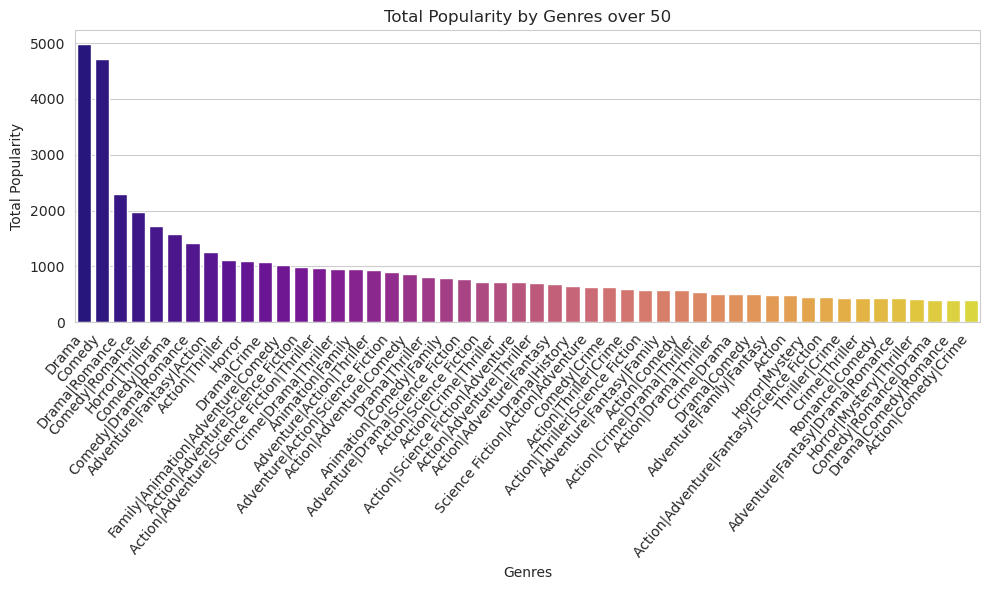

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=grouped.index, y=grouped.values, palette="plasma")
plt.title('Total Popularity by Genres over 50')
plt.xlabel("Genres")
plt.ylabel("Total Popularity")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.show()

<div style="background-color: #b3adad; border:3px solid #757373; border-radius:3px; font-size:25px">
    <h3 style='color:#ad312d; text-align:center'>Conclusion</h3>
    <ul>
        <li style="font-size:20px; color:white">Drama is the most popular genre</li>
        <li style="font-size:20px; color:white">Comedy is the second popular genre</li>
    </ul>
</div>


### 2. What is the top 10 used language in films?

In [26]:
languages = movies_new.spoken_languages.value_counts()[:10]
languages

spoken_languages
English             2939
English|Español      124
English|Français     111
Español|English       52
English|Deutsch       52
English|Pусский       50
English|Italiano      48
Français              45
English|日本語           23
Français|English      23
Name: count, dtype: int64

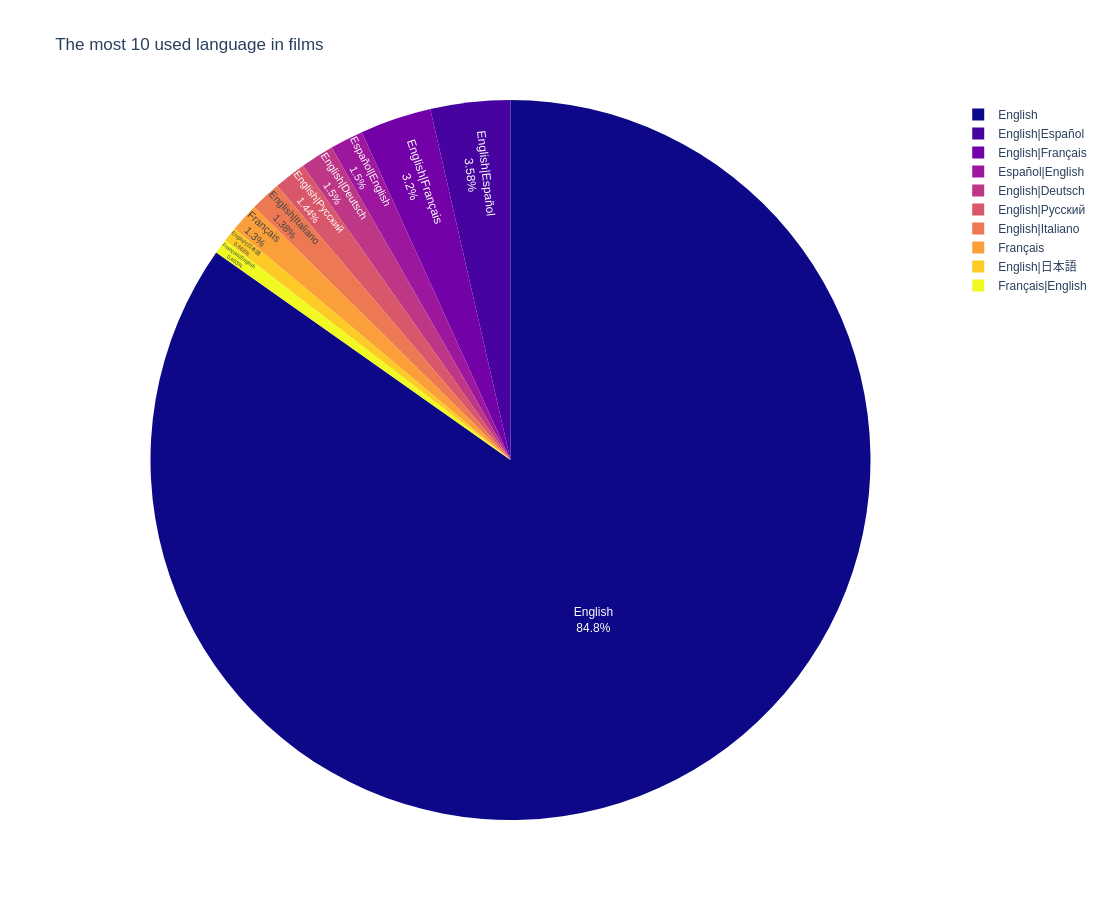

In [169]:
fig = px.pie(movies_new, values=languages.values, names=languages.index, title='The most 10 used language in films',
             width=800, height=900, color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12)
fig.show()

<div style="background-color: #b3adad; border:3px solid #757373; border-radius:3px; font-size:25px">
    <h3 style='color:#ad312d; text-align:center'>Conclusion</h3>
    <ul>
        <li style="font-size:20px; color:white">English spoken language is the most used in films.</li>
    </ul>
</div>

### 3. Top 10 Movies by Revenue

In [28]:
movies_new.original_title[:10]

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
6                                     Tangled
7                     Avengers: Age of Ultron
8      Harry Potter and the Half-Blood Prince
9          Batman v Superman: Dawn of Justice
Name: original_title, dtype: object

In [29]:
top_rev = movies_new.sort_values("revenue", ascending=False)[:10]

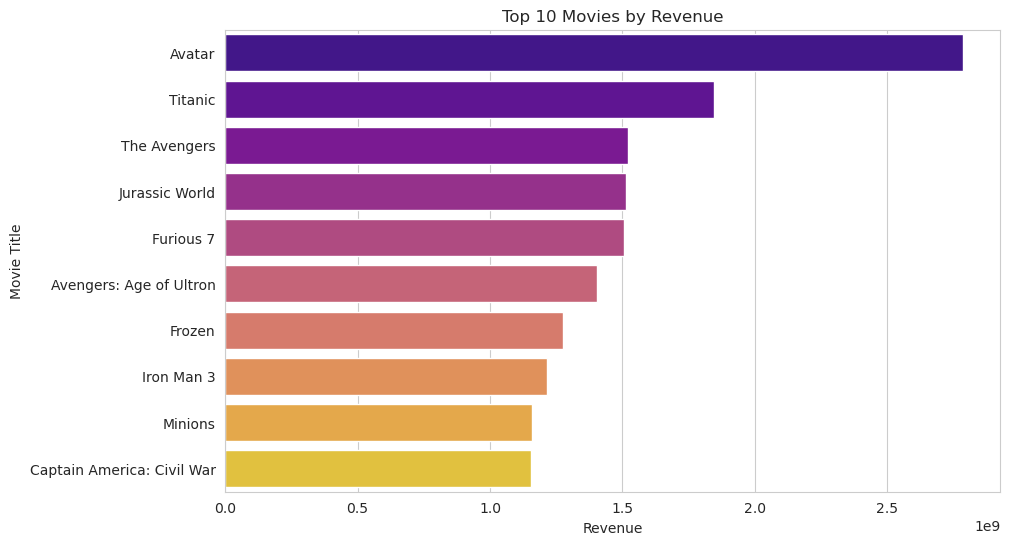

In [30]:
plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
sns.barplot(x=top_rev["revenue"], y=top_rev["original_title"], palette="plasma")

plt.xlabel("Revenue")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Revenue")
plt.show()

<div style='border:3px solid #4a2956; border-radius:3px; padding:2px'>
    <h3 style='color:crimson; text-align:center; font-size:30px'>Note</li></h3>
    <li style='font-size:20px'>In programming, `1e9` is a scientific notation for the number 1,000,000,000, which is equivalent to 1 billion.</li>
</div>

### 4. Which production companies rank in the top 10 for highest profit?

In [31]:
grouped_profit = movies_new.groupby("production_companies")["profit"].agg("sum").sort_values(ascending=False)[:10]

/tmp/ipykernel_9434/2727881502.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



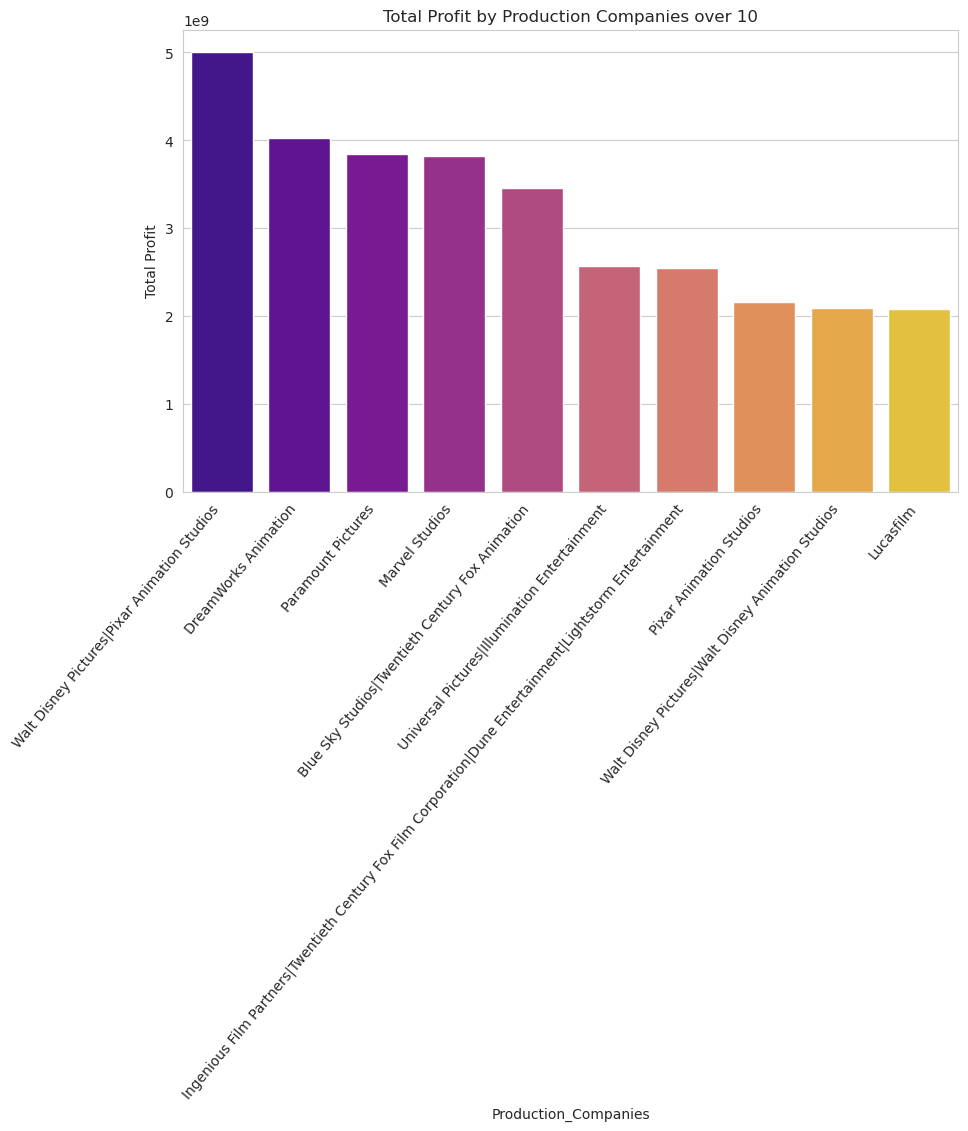

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=grouped_profit.index, y=grouped_profit.values, palette="plasma")
plt.title('Total Profit by Production Companies over 10')
plt.xlabel("Production_Companies")
plt.ylabel("Total Profit")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.show()

### 5. How many movies are there in each genre?

In [33]:
genres_count = movies_new["genres"].value_counts()[:20]

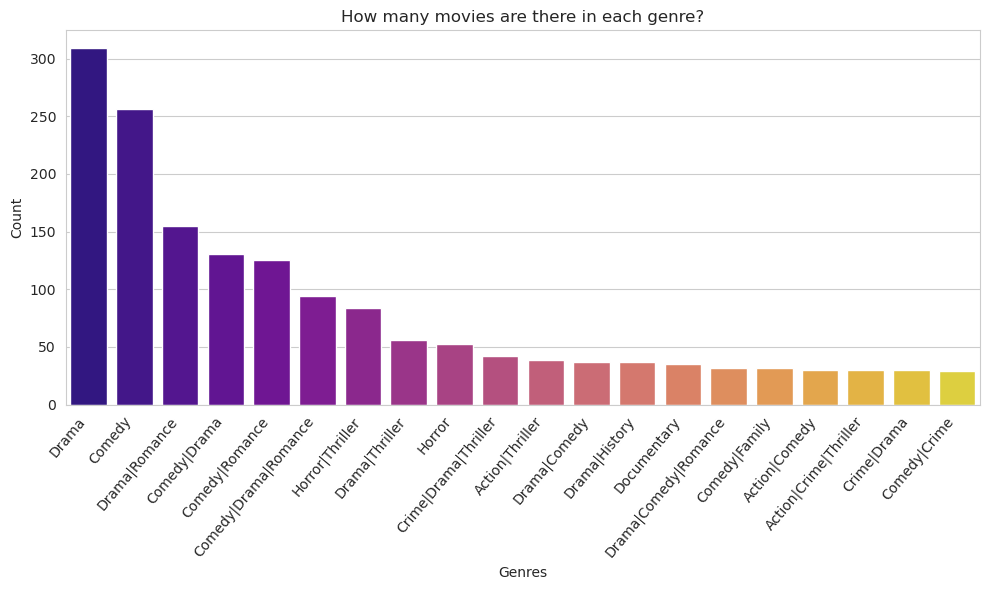

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=genres_count.index,y=genres_count.values,palette="plasma")
plt.xticks(rotation=50, ha='right')
plt.title('How many movies are there in each genre?')
plt.xlabel("Genres")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<div style="background-color: #b3adad; border:3px solid #757373; border-radius:3px; font-size:25px">
    <h3 style='color:#ad312d; text-align:center'>Conclusion</h3>
    <ul>
        <li style="font-size:20px; color:white">Drama is the most genre which has more movies.</li>
    </ul>
</div>

### What percentage of movies are released in each decade?
* We will create a new column to store the year which called `release_year`

In [157]:
movies_new['release_year'] = movies_new.release_date.dt.year

In [166]:
decade = movies_new.release_year // 10 *10
decade_num = decade.value_counts()
decade_num.index

Index([2000, 2010, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920, 1910], dtype='int32', name='release_year')

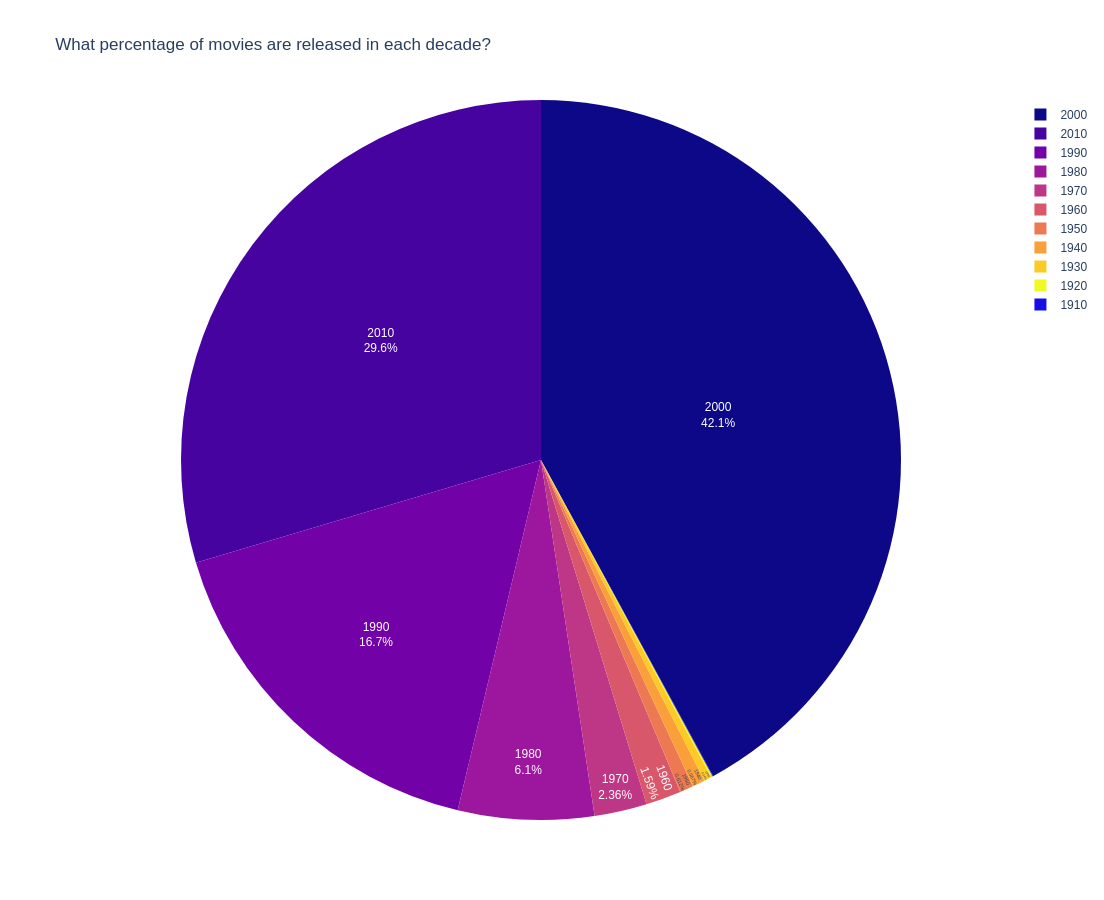

In [170]:
fig = px.pie(values=decade_num.values, names=decade_num.index, title='What percentage of movies are released in each decade?',
             width=800, height=900, color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12)
fig.show()

### Movies Counts over the years from `1910` till `2000`

In [179]:
movies_count = movies_new[movies_new['release_year'] <= 2000]["release_year"].value_counts()
movies_count

release_year
1999    157
2000    152
1998    125
1997    104
1996     94
       ... 
1958      1
1950      1
1927      1
1930      1
1934      1
Name: count, Length: 72, dtype: int64

/home/omar/anaconda3/envs/deci/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/omar/anaconda3/envs/deci/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



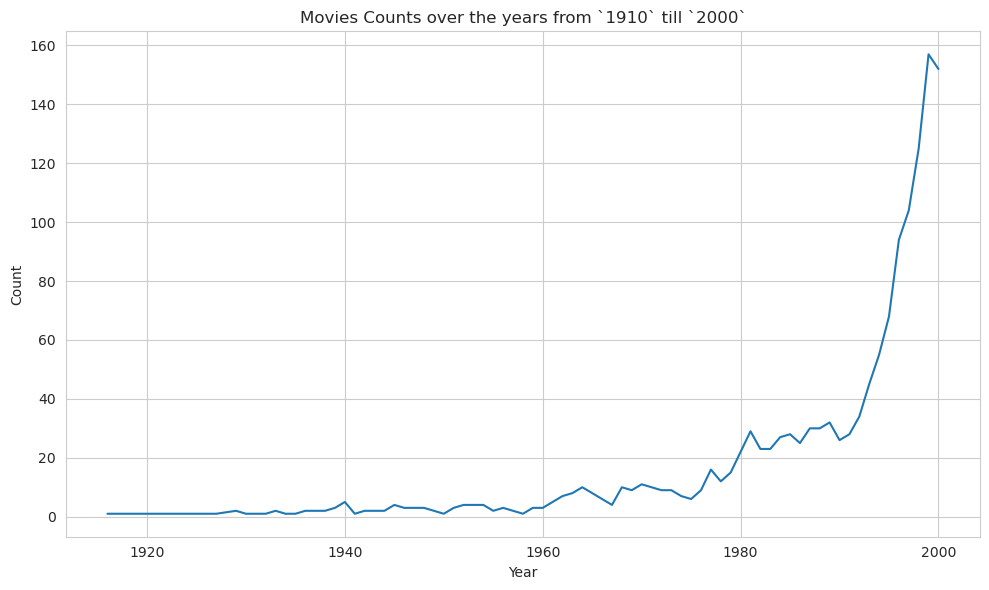

In [181]:
plt.figure(figsize=(10,6))
sns.lineplot(x=movies_count.index, y=movies_count.values)
plt.title('Movies Counts over the years from `1910` till `2000`')
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<a id="conclusions"></a>
<ol><h1 style='color:#ba2b43'>Conclusions:</h1>
    <li style='font-size:17px'>We concluded that the `Drama` genre is the most popular genre.</li>
    <li style='font-size:17px'>We concluded that the `English` language is the most used language in films about `85%`.</li>
    <li style='font-size:17px'>We concluded that the `Avatar` film broke highest grossing movie about `$2B`.</li>
    <li style='font-size:17px'>We concluded that the `Walt Disney Pictures|Pixar Animation Studios` production company broke highest `profit` in films about `$5B`.  </li>
    <li style='font-size:17px'>We concluded that the `Drama` genre has the most count of films.</li>
    <li style='font-size:17px'>We concluded that the `2000s` has the most released movies.</li>
    <li style='font-size:17px'>We concluded that the movie count has been increasing since `1940` and still.</li>
</ol>


<a id="limitations"></a>
<ul><h1 style='color:#ba2b43'>Limitations:</h1>
    <li>There're lots of missing values `empty` or `[]` or `NaN`</li>
    <li>There're lots of zeros in `budget` & `revenue` about quarter of the data, If we drop them we will lose large number of the data.</li>
    <li>It will be better if there's a column called `profit` or `director`, To know more insights about the directors.</li>
</ul>